In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flickr8k/captions.txt
/kaggle/input/flickr8k/Images/3226254560_2f8ac147ea.jpg
/kaggle/input/flickr8k/Images/214543992_ce6c0d9f9b.jpg
/kaggle/input/flickr8k/Images/2366643786_9c9a830db8.jpg
/kaggle/input/flickr8k/Images/3368819708_0bfa0808f8.jpg
/kaggle/input/flickr8k/Images/2190227737_6e0bde2623.jpg
/kaggle/input/flickr8k/Images/2752809449_632cd991b3.jpg
/kaggle/input/flickr8k/Images/3097776588_312932e438.jpg
/kaggle/input/flickr8k/Images/1206506157_c7956accd5.jpg
/kaggle/input/flickr8k/Images/1319634306_816f21677f.jpg
/kaggle/input/flickr8k/Images/2465218087_fca77998c6.jpg
/kaggle/input/flickr8k/Images/3351493005_6e5030f596.jpg
/kaggle/input/flickr8k/Images/2949337912_beba55698b.jpg
/kaggle/input/flickr8k/Images/534886684_a6c9f40fa1.jpg
/kaggle/input/flickr8k/Images/3543600125_223747ef4c.jpg
/kaggle/input/flickr8k/Images/2174206711_11cb712a8d.jpg
/kaggle/input/flickr8k/Images/280706862_14c30d734a.jpg
/kaggle/input/flickr8k/Images/2100735137_05c6079537.jpg
/kaggle/input/f

In [7]:
import os

# Define the Kaggle input directory
input_dir = "/kaggle/input"

# List all dataset folders inside "/kaggle/input/"
dataset_folders = os.listdir(input_dir)

# Print the dataset folder names
print("Dataset folders inside /kaggle/input/:")
for folder in dataset_folders:
    print(folder)


Dataset folders inside /kaggle/input/:
flickr8k


In [10]:
import os
import random

# Define the correct dataset directory where images are stored
image_dir = "/kaggle/input/flickr8k/Images"

# Ensure the dataset directory exists
if not os.path.exists(image_dir):
    print(f"Error: Dataset directory '{image_dir}' not found.")
else:
    # Get a list of all image files in the dataset
    image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Check if there are at least 10 images
    if len(image_files) < 10:
        print(f"Error: Only {len(image_files)} images found. Cannot sample 10 images.")
    else:
        # Randomly select 10 images
        random_sample = random.sample(image_files, 10)

        # Print selected images
        print("Randomly selected images for training/testing:")
        for img in random_sample:
            print(img)


Randomly selected images for training/testing:
/kaggle/input/flickr8k/Images/859620561_de417cac1e.jpg
/kaggle/input/flickr8k/Images/398413603_166896900f.jpg
/kaggle/input/flickr8k/Images/3695517194_2a6b604cb2.jpg
/kaggle/input/flickr8k/Images/3708266246_97a033fcc7.jpg
/kaggle/input/flickr8k/Images/566794440_f9ec673a2f.jpg
/kaggle/input/flickr8k/Images/3520079657_b828d96d50.jpg
/kaggle/input/flickr8k/Images/2123932281_1a4fd38455.jpg
/kaggle/input/flickr8k/Images/2303356248_65dd6aba6f.jpg
/kaggle/input/flickr8k/Images/3677927146_1696f0b075.jpg
/kaggle/input/flickr8k/Images/482353373_03a9d5e8bc.jpg


In [16]:

from PIL import Image

# Load ViT feature extractor
from transformers import ViTImageProcessor
feature_extractor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")


# Function to preprocess images
def preprocess_images(image_paths):
    images = [Image.open(img).convert("RGB") for img in image_paths]
    return feature_extractor(images, return_tensors="pt")

# Preprocess the selected 10 images
image_inputs = preprocess_images(random_sample)


In [20]:
from transformers import AutoTokenizer
import pandas as pd

# Load the GPT-2 tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Fix the padding issue
tokenizer.pad_token = tokenizer.eos_token  # Set padding token as EOS token

# Path to captions file
captions_file = "/kaggle/input/flickr8k/captions.txt"

# Load the captions dataset
captions_df = pd.read_csv(captions_file)

# Dictionary to store image-caption mappings
image_captions = {}

# Iterate through the dataset and store captions for each image
for _, row in captions_df.iterrows():
    image_name = row["image"]  # Assuming the column name is 'image'
    caption = row["caption"]    # Assuming the column name is 'caption'

    # Store multiple captions for each image
    if image_name in image_captions:
        image_captions[image_name].append(caption)
    else:
        image_captions[image_name] = [caption]

# Filter captions for the selected 10 images
selected_captions = {img: image_captions[os.path.basename(img)] for img in random_sample}

# Tokenize captions with proper padding
tokenized_captions = {img: [tokenizer(caption, padding="max_length", truncation=True, max_length=50, return_tensors="pt") 
                            for caption in captions] 
                      for img, captions in selected_captions.items()}

# Print tokenized captions
for img, tokens in tokenized_captions.items():
    print(f"Tokenized captions for {img}:")
    for token in tokens:
        print(token.input_ids)


Tokenized captions for /kaggle/input/flickr8k/Images/859620561_de417cac1e.jpg:
tensor([[   32,  7586,  3290, 16508,   257,  1305,   271, 20963,   287,   262,
          1633,   764, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]])
tensor([[   32,  3290,   318, 14284,   287,   262,  1633,   284,  4929,   281,
          2378,   764, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]])
tensor([[   32,  3290, 37312,  1029,   287,   262,  1633,   284,  4929,   257,
         13373,   625,   262,  4077,  8701,   76

In [24]:
import torch

# Convert tokenized captions to tensors
processed_captions = {img: torch.stack([token["input_ids"].squeeze(0) for token in tokens])
                      for img, tokens in tokenized_captions.items()}


In [25]:
# Create dataset structure
dataset = []
for img, captions in processed_captions.items():
    dataset.append({"image": image_inputs, "captions": captions})


In [27]:
from torch.utils.data import Dataset

class ImageCaptionDataset(Dataset):
    def __init__(self, image_inputs, tokenized_captions):
        self.image_inputs = image_inputs  # ViT image features
        self.tokenized_captions = tokenized_captions  # GPT-2 tokenized captions

    def __len__(self):
        return len(self.image_inputs)

    def __getitem__(self, idx):
        image = self.image_inputs["pixel_values"][idx]  # Extract image tensor
        captions = self.tokenized_captions[list(self.tokenized_captions.keys())[idx]]  # Extract captions
        return image, captions

# Create dataset instance
caption_dataset = ImageCaptionDataset(image_inputs, processed_captions)


Hi


In [28]:
from torch.utils.data import DataLoader

# Define DataLoader
batch_size = 2  # Adjust based on GPU memory
dataloader = DataLoader(caption_dataset, batch_size=batch_size, shuffle=True)


In [29]:
from transformers import VisionEncoderDecoderModel

# Load ViT-GPT2 Model
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.0"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

In [30]:
from transformers import AdamW

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(i

In [31]:
num_epochs = 3  # Adjust based on available compute power

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in dataloader:
        images, captions = batch
        images, captions = images.to(device), captions.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=images, labels=captions)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(dataloader)}")


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Epoch 1/3, Loss: 9.332386016845703
Epoch 2/3, Loss: 2.908703565597534
Epoch 3/3, Loss: 2.7160730361938477


In [32]:
model.eval()
with torch.no_grad():
    sample_image = image_inputs["pixel_values"][0].unsqueeze(0).to(device)  # Select one test image
    generated_ids = model.generate(sample_image, max_length=50)
    generated_caption = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    print("Generated Caption:", generated_caption)


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Caption: a dog jumping in the air to catch a frisbee 


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.0"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

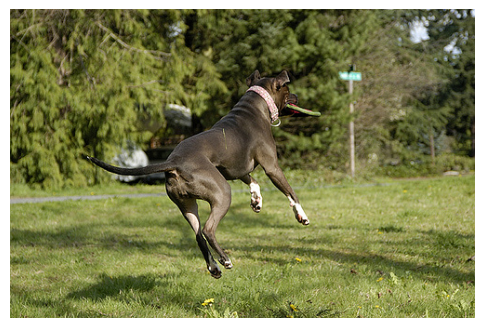

📌 **Image:** /kaggle/input/flickr8k/Images/859620561_de417cac1e.jpg
✅ **Actual Captions:**
 - A brown dog catching a Frisbee in the air .
 - A dog is jumping in the air to catch an item .
 - A dog leaps high in the air to catch a toy over the green grass .
 - Black dog catching Frisbee at the park .
 - Black dog with collar jumping up with a stick in his mouth

🚀 **Predicted Caption:** a dog jumping in the air to catch a frisbee 


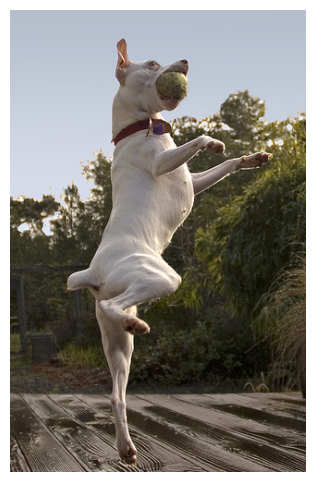

📌 **Image:** /kaggle/input/flickr8k/Images/398413603_166896900f.jpg
✅ **Actual Captions:**
 - A small white dog jumping to catch a tennis ball .
 - A small white dog stands on one leg to catch a ball .
 - A white dog is in the air with a ball in its mouth .
 - A white dog is leaping into the air to catch a ball in its mouth .
 - A white dog with a black collar jumps up to catch a tennis ball

🚀 **Predicted Caption:** a dog jumping up to catch a frisbee 


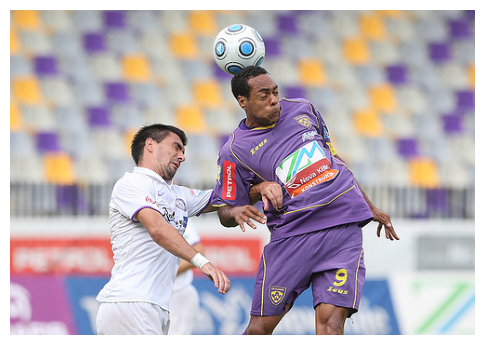

📌 **Image:** /kaggle/input/flickr8k/Images/3695517194_2a6b604cb2.jpg
✅ **Actual Captions:**
 - A black soccer male soccer player in a purple uniform with a soccer ball on his head , and a white male soccer player in a white uniform behind him .
 - A man in purple bumps the soccer ball with his head while a man in white battles with him .
 - A man on the purple team heading the ball in a game against the white team
 - Two guys colliding while playing soccer
 - Two guys playing ball and making faces .

🚀 **Predicted Caption:** a soccer player kicking a soccer ball 


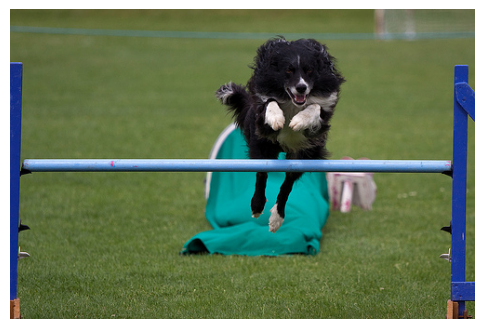

📌 **Image:** /kaggle/input/flickr8k/Images/3708266246_97a033fcc7.jpg
✅ **Actual Captions:**
 - A black and white dog is going through an obstacle course .
 - A black and white dog jumps over a bar .
 - A black dog leaping over a hurdle .
 - A border collie jumping over a hurdle .
 - Black and white dog jumping over a blue obstacle

🚀 **Predicted Caption:** a dog is sitting on a bench with a ball 


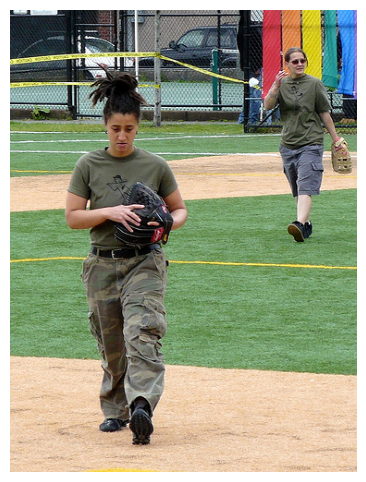

📌 **Image:** /kaggle/input/flickr8k/Images/566794440_f9ec673a2f.jpg
✅ **Actual Captions:**
 - girls with baseball gloves walking across a baseball field
 - A woman in camouflage and her hair up in a ponytail walks on the field with a black softball glove on one hand .
 - A woman playing baseball walks back to her base while her feamle teammate follows .
 - A woman with a glove on a baseball field with another woman
 - The girls return to the field during their softball game .

🚀 **Predicted Caption:** a young boy in a baseball uniform holding a baseball bat 


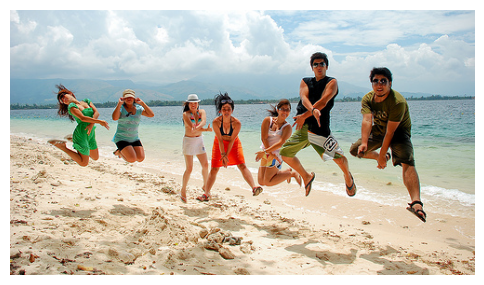

📌 **Image:** /kaggle/input/flickr8k/Images/3520079657_b828d96d50.jpg
✅ **Actual Captions:**
 - A group of people jump in the sand at the beach .
 - a group of teenagers are jumping in the air on the beach .
 - A group of young people jump up in the air while on the beach .
 - A group of young people posing in the air on a sandy beach .
 - Seven people are jumping in the air , along the shore .

🚀 **Predicted Caption:** people on a beach with a frisbee 


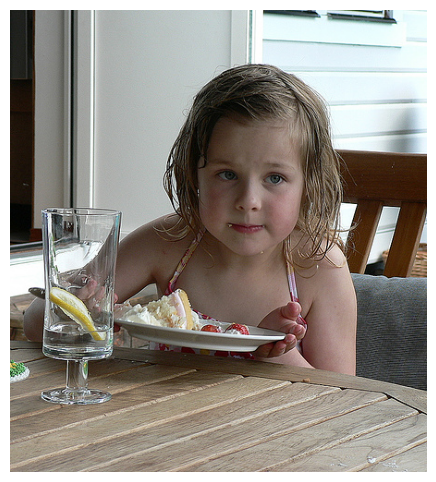

📌 **Image:** /kaggle/input/flickr8k/Images/2123932281_1a4fd38455.jpg
✅ **Actual Captions:**
 - A girl wearing a halter top eats cake at a table .
 - a little girl holds up her plate .
 - A little girl is eating cake and strawberries at a wooden table .
 - A young girl sits at a table and eats .
 - The little girl is eating outdoors .

🚀 **Predicted Caption:** a little girl sitting at a table eating a piece of cake 


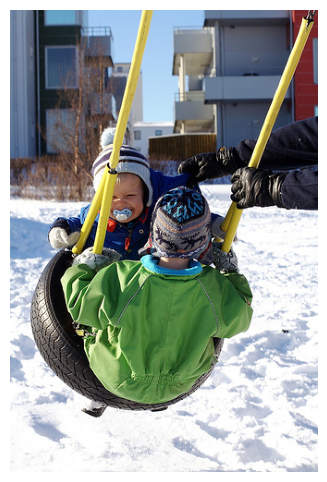

📌 **Image:** /kaggle/input/flickr8k/Images/2303356248_65dd6aba6f.jpg
✅ **Actual Captions:**
 - Kids wearing jackets and hats swinging on tire swing in snow
 - Two children swing in a tire in the snow at a park .
 - Two children swing on a tire swing on a snowy day .
 - Two kids in snow hats and blue and green coats are swinging on a tire swing out in the snow .
 - Two young children are being pushed on a tire swing with snow on the ground .

🚀 **Predicted Caption:** a little boy in a helmet is holding a snowboard 


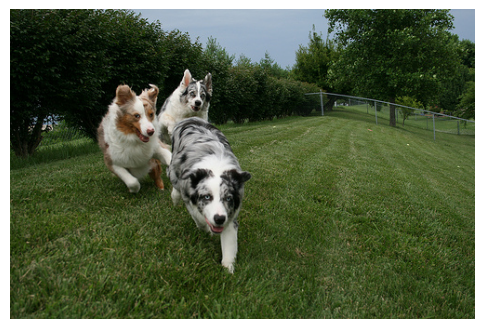

📌 **Image:** /kaggle/input/flickr8k/Images/3677927146_1696f0b075.jpg
✅ **Actual Captions:**
 - Several large dogs are running through a large grassy area .
 - Three dogs moving through grass .
 - Three dogs on grass running towards the camera .
 - Three dogs running in a field of grass .
 - Three dogs run through a manicured lawn .

🚀 **Predicted Caption:** two dogs are playing in a field 


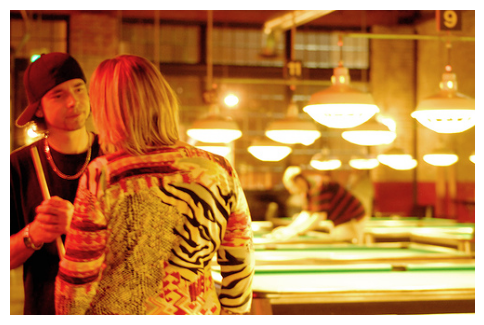

📌 **Image:** /kaggle/input/flickr8k/Images/482353373_03a9d5e8bc.jpg
✅ **Actual Captions:**
 - A girl in a petterned shirt is talking to a guy with a hat in a billiards room .
 - A man holding a pool stick talking to a woman in a pool hall
 - A man in a black hat is talking to a woman with an animal print shirt .
 - Boy holding pool cue looking at person in sweater
 - Two people are talking to each other at a pool place .

🚀 **Predicted Caption:** a woman standing next to a man in a restaurant 


In [33]:
import matplotlib.pyplot as plt
from transformers import VisionEncoderDecoderModel

# Load the model (assuming it's already trained or pre-trained)
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

def generate_caption(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    inputs = feature_extractor(image, return_tensors="pt")

    # Generate caption
    output = model.generate(**inputs)
    predicted_caption = tokenizer.decode(output[0], skip_special_tokens=True)

    return image, predicted_caption

# Loop through the selected images
for img_path in random_sample:
    image, predicted_caption = generate_caption(img_path)

    # Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    # Print actual captions
    print(f"📌 **Image:** {img_path}")
    print("✅ **Actual Captions:**")
    for caption in selected_captions[img_path]:
        print(f" - {caption}")

    # Print the model-generated caption
    print(f"\n🚀 **Predicted Caption:** {predicted_caption}")
    print("="*80)  # Separator for better readability


FINE TUNING THE MODEL


In [34]:
pip install transformers datasets torch torchvision accelerate


Note: you may need to restart the kernel to use updated packages.
